In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
con= sqlite3.connect(r'./sample_data/password_data.sqlite')

In [3]:
data= pd.read_sql_query("SELECT * FROM users", con)
data.shape

(100000, 3)

In [4]:
data.head()

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


### Data Cleaning

In [5]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

In [6]:
#Drop index column
data.drop(["index"], axis=1, inplace = True)

In [7]:
data.duplicated().sum()
#No duplicate data found

0

In [8]:
data.isnull().any().sum()
#No missing value

0

In [9]:
data.dtypes

password    object
strength     int64
dtype: object

In [10]:
data["strength"].unique()
#No irrelevent row

array([1, 2, 0])

### Performing Semantic Analysis
1. How many passwords have only numerical character?
2. How many passwords have only uppercase character?
3. How many passwords have alpha numeric character?
4. How many passwords have title case chracter?
5. How many passwords have special chracter?
6. How many passwords have only alphabets?

In [11]:
type(data["password"][0])

str

In [12]:
data[data["password"].str.isnumeric()].shape
#26 passwords have only numerical value

(26, 2)

In [13]:
data[data["password"].str.isupper()]
#1506 passwords have uppercase character

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [14]:
data[data["password"].str.isalpha()].shape
#50 passwords have only alphabets.

(50, 2)

In [15]:
data[data["password"].str.isalnum()].shape
#97203 passwords have alphanumeric character

(97203, 2)

In [16]:
data[data["password"].str.istitle()].shape
#932 passwords have titlecase character

(932, 2)

In [17]:
import string

In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass
    return 0

In [20]:
data[data["password"].apply(find_semantics)==1]
#2663 passwords have titlecase character

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


### Feature Engineering

In [21]:
def calculate_string_length(row):
    return len(row)

In [22]:
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

In [23]:
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

In [24]:
def freq_num(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [25]:
def freq_special_case(row):
    special_chars = [char for char in row if not char.isalpha() and not char.isdigit()]
    return len(special_chars)/len(row)

In [26]:
# or
#def freq_special_case(row):
#    special_chars = [char for char in row if char in string.punctuation]
#    return len(special_chars)/len(row)

In [27]:
data["length"]= data["password"].apply(calculate_string_length)
data["lowercase_freq"]=np.round(data["password"].apply(freq_lowercase),2)
data["uppercase_freq"]=np.round(data["password"].apply(freq_uppercase),2)
data["numerical_freq"]=np.round(data["password"].apply(freq_num),2)
data["special_char_freq"]=np.round(data["password"].apply(freq_special_case),2)

In [28]:
data.head()

,password,strength,length,lowercase_freq,uppercase_freq,numerical_freq,special_char_freq
0,zxe870819,1,9,0.33,0.0,0.67,0.00
1,xw46454nr23l,1,12,0.42,0.0,0.58,0.00
2,soporte13,1,9,0.78,0.0,0.22,0.00
3,accounts6000webhost.com,2,23,0.78,0.0,0.17,0.04
4,c443balg,1,8,0.62,0.0,0.38,0.00


### Performing Data Analysis

In [29]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'numerical_freq', 'special_char_freq'],
      dtype='object')

In [30]:
cols = ['length', 'lowercase_freq', 'uppercase_freq',
       'numerical_freq', 'special_char_freq']

for col in cols:
    print(col)
    print(data[[col , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"]))
    print('\n')


#Higher the length, Higher the strength
# In case on alphabet frequency higher is not better.
#because it'll not be a strong password if max portion is occupied by just alphabets..
#Password has more strength if the char types are spread in decent proportions.

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                       
                    min   max      mean median
strength                                      
0                   0.0  1.00  0.707861   0.71
1                   0.0  0.92  0.630550   0.67
2                   0.0  0.92  0.425160   0.40


uppercase_freq
         uppercase_freq                       
                    min   max      mean median
strength                                      
0                   0.0  1.00  0.012858   0.00
1                   0.0  0.92  0.007917   0.00
2                   0.0  0.89  0.367897   0.43


numerical_freq
         numerical_freq                       
                    min   max      mean median
strength                                      
0  

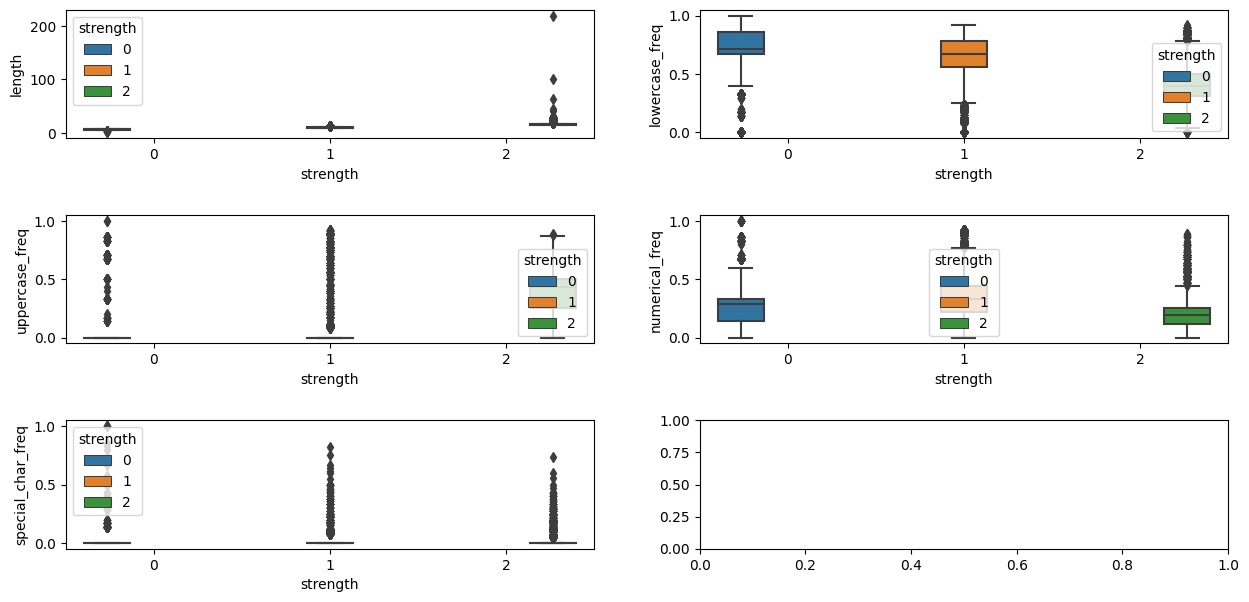

In [31]:
fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5,ax6)) = plt.subplots(3 , 2 , figsize=(15,7))

sns.boxplot(x="strength" , y='length' , hue="strength" , ax=ax1 , data=data)
sns.boxplot(x="strength" , y='lowercase_freq' , hue="strength" , ax=ax2, data=data)
sns.boxplot(x="strength" , y='uppercase_freq' , hue="strength" , ax=ax3, data=data)
sns.boxplot(x="strength" , y='numerical_freq' , hue="strength" , ax=ax4, data=data)
sns.boxplot(x="strength" , y='special_char_freq' , hue="strength" , ax=ax5, data=data)

plt.subplots_adjust(hspace=0.6)

### Interesting Feature Selection

In [32]:
def get_dist(data, feature):
    plt.figure(figsize=(10, 8))

    # Violin plot
    plt.subplot(1, 2, 1)
    sns.violinplot(x='strength', y=feature, data=data)

    # Distribution plots
    plt.subplot(1, 2, 2)
    sns.kdeplot(data=data[data['strength'] == 0][feature], color="red", label="0", fill=True)
    sns.kdeplot(data=data[data['strength'] == 1][feature], color="blue", label="1", fill=True)
    sns.kdeplot(data=data[data['strength'] == 2][feature], color="orange", label="2", fill=True)

    plt.legend()
    plt.show()

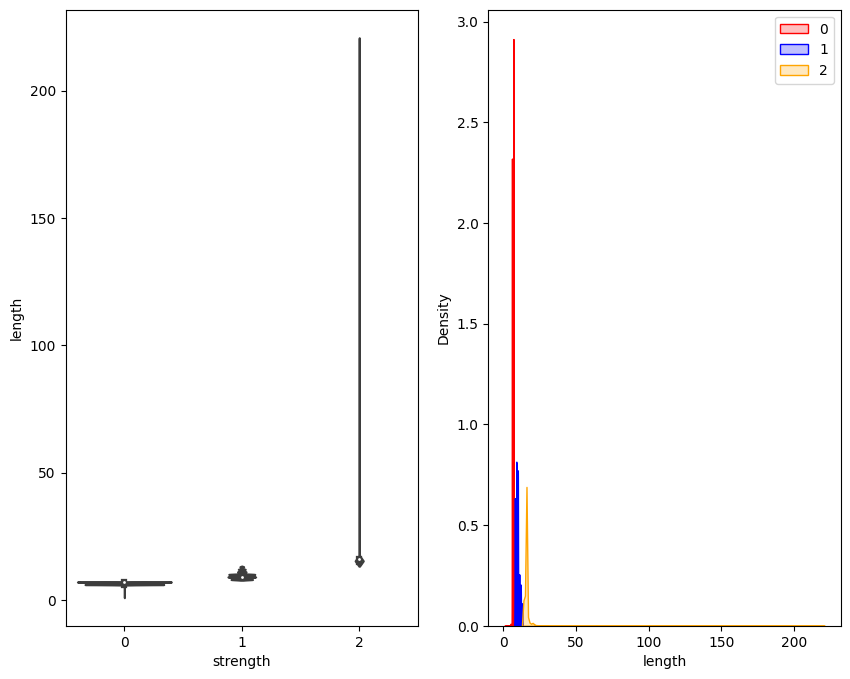

In [33]:
get_dist(data , "length")

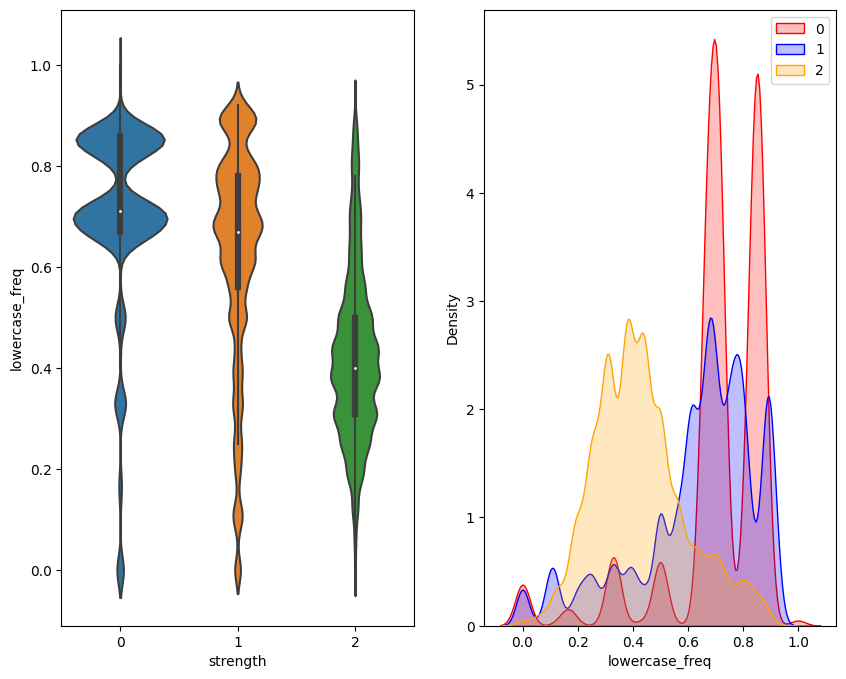

In [34]:
get_dist(data , "lowercase_freq")

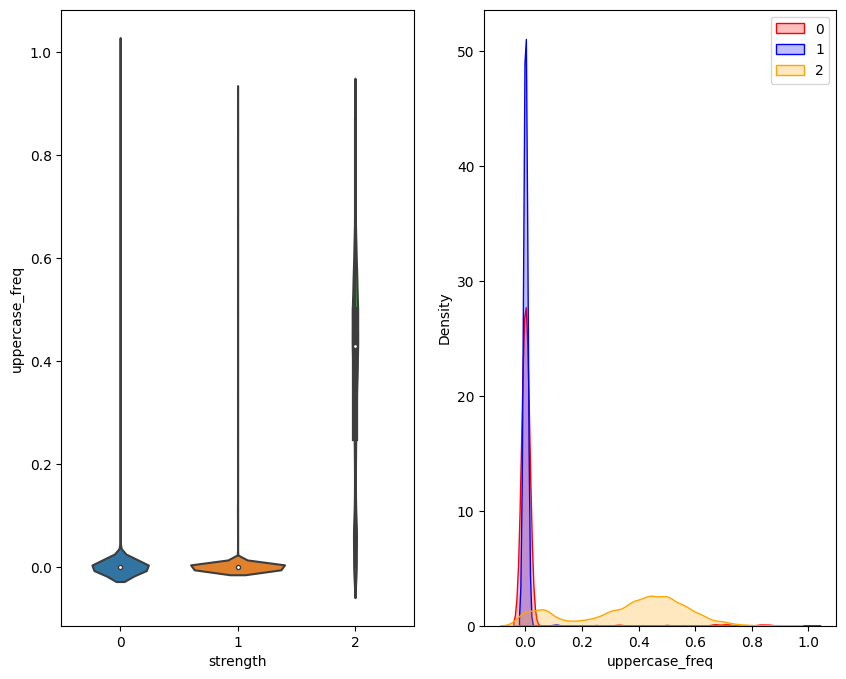

In [35]:
get_dist(data , "uppercase_freq")

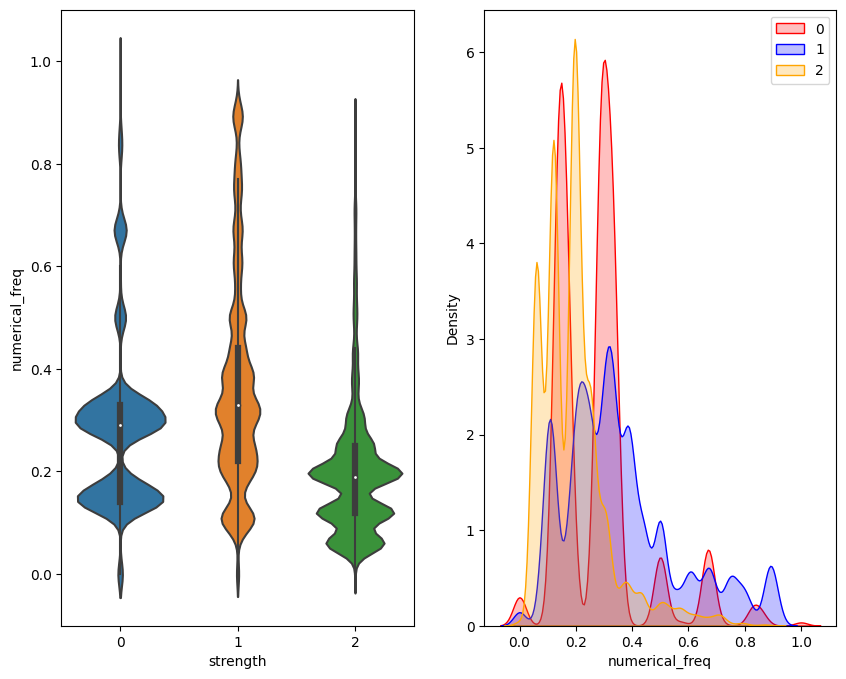

In [36]:
get_dist(data , "numerical_freq")

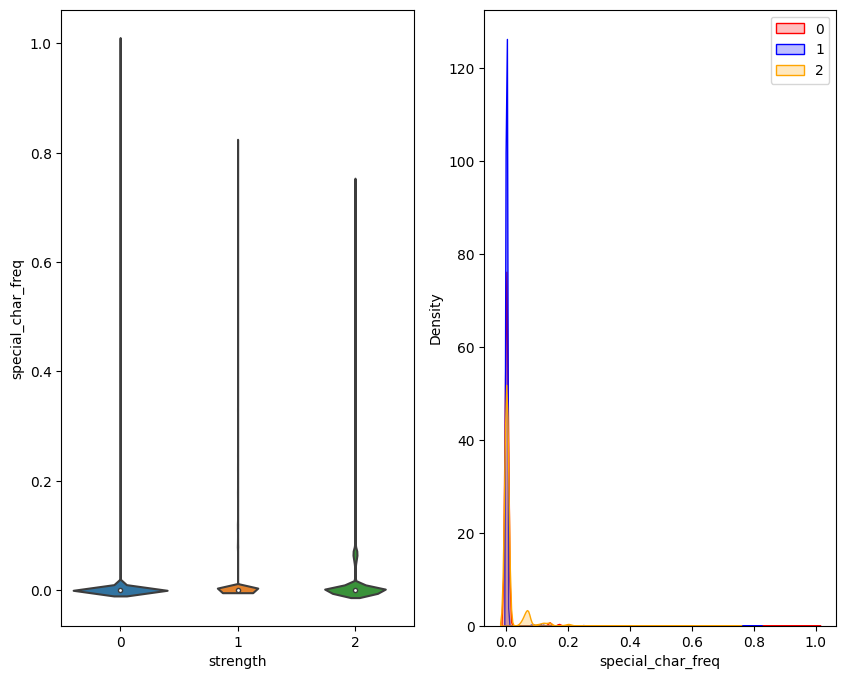

In [37]:
get_dist(data , "special_char_freq")

In [38]:
#only for lower case and length the overlapping is minimal so they are the interesting features

### Apply TF-IDF

In [39]:
dataframe = data.sample(frac=1) ### shuffling randomly for robustness of ML moodel

In [40]:
x = list(dataframe["password"])

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer="char")
X = vectorizer.fit_transform(x)

In [42]:
X.shape

(100000, 99)

In [43]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
### returns feature/char_of_passwords/columns names

vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [45]:
df2 = pd.DataFrame(X.toarray() , columns=vectorizer.get_feature_names_out())

### Apply ML Algo

In [46]:
dataframe.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'numerical_freq', 'special_char_freq'],
      dtype='object')

In [91]:
df2["length"] = dataframe['length']
df2["lowercase_freq"] = dataframe['lowercase_freq']
df2

,,,,,,,,,!,#,...,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq,special_char_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.33,0.00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.42,0.00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.78,0.00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.78,0.04
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.62,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.70,0.00
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.80,0.00
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.78,0.00
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.67,0.00


In [92]:
y = dataframe["strength"]

In [93]:
# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20)

In [94]:
X_train.shape

(80000, 102)

In [95]:
y_train.shape

(80000,)

In [104]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=5000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='multinomial')

In [107]:
y_pred = clf.predict(X_test) ## doing prediction on X-Test data
y_pred

array([2, 1, 1, ..., 1, 1, 1])

In [108]:
from collections import Counter
Counter(y_pred)

Counter({2: 2016, 1: 16714, 0: 1270})

### Model Evaluation

In [110]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix ,  accuracy_score , classification_report

# Apply Stratified k-fold Cross-Validation
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=stratified_kfold, scoring='accuracy')

# Print and Evaluate Results
print(f'Stratified Cross-Validation Scores: {scores}')
print(f'Mean Accuracy: {scores.mean()}')

Stratified Cross-Validation Scores: [0.8119 0.8187 0.8129 0.8107 0.8176 0.8187 0.8135 0.8175 0.8211 0.818 ]
Mean Accuracy: 0.81606


In [100]:
confusion_matrix(y_test , y_pred)

array([[  761,  1968,     1],
       [  491, 13900,   370],
       [   18,   846,  1645]])

In [101]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.60      0.28      0.38      2730
           1       0.83      0.94      0.88     14761
           2       0.82      0.66      0.73      2509

    accuracy                           0.82     20000
   macro avg       0.75      0.63      0.66     20000
weighted avg       0.80      0.82      0.80     20000



In [103]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000)

# Apply Stratified k-fold Cross-Validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

# Print and Evaluate Results
print(f'Stratified Cross-Validation Scores: {scores}')
print(f'Mean Accuracy: {scores.mean()}')

Stratified Cross-Validation Scores: [0.8151  0.8117  0.81765 0.8146  0.8192 ]
Mean Accuracy: 0.81565
